In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("/Users/User/Downloads/Titanic-Dataset.csv")
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
####Data Cleaning
mean_age = dataset["Age"].mean()
dataset["Age"] = dataset["Age"].fillna(mean_age)


In [4]:
###Median
np.median(dataset["Age"])

29.69911764705882

In [5]:
####Median
md=np.mean(dataset["Fare"])

In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

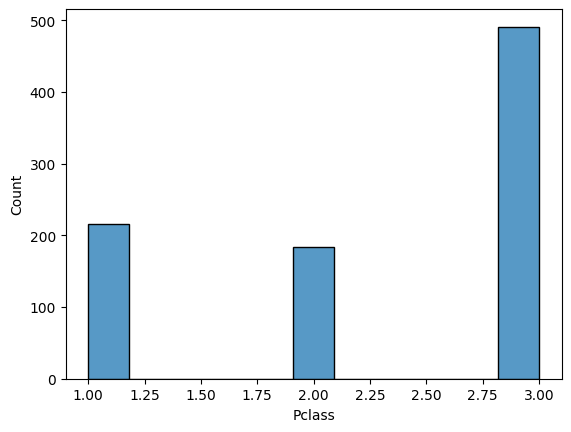

In [7]:
sns.histplot(x="Pclass",data=dataset)
plt.show()

In [8]:
###Mean
mn=np.mean(dataset["Fare"])

In [9]:
####Mode
mo=dataset["Fare"].mode()[0]

In [10]:
dataset["Fare"].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

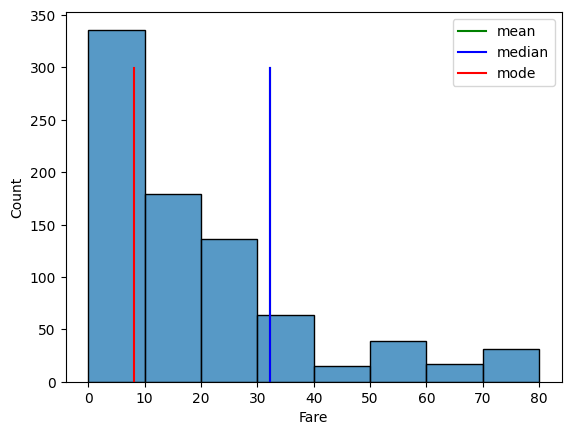

In [11]:
sns.histplot(x="Fare",data=dataset,bins=[i for i in range(0,81,10)])
plt.plot([mn for i in range(0,300)],[i for i in range(0,300)],c="green",label="mean")
plt.plot([md for i in range(0,300)],[i for i in range(0,300)],c="blue",label="median")
plt.plot([mo for i in range(0,300)],[i for i in range(0,300)],c="red",label="mode")
plt.legend()
plt.show()

In [12]:
####range
mi=dataset["Age"].min()
ma=dataset["Age"].max()

In [13]:
mi,ma

(0.42, 80.0)

In [14]:
range = ma - mi

In [15]:
range

79.58

In [16]:
### Mean Absolute deviation
sec_a=np.array([75,65,73,68,72,76])
sec_b=np.array([90,47,43,96,93,51])
no=np.array([1,2,3,4,5,6])

In [17]:
mean=np.mean(sec_b)

In [18]:
mad_a=np.sum(abs(sec_a-mean))/len(sec_a)
mad_b=np.sum(abs(sec_b-mean))/len(sec_b)

In [19]:
mad_a,mad_b

(3.8333333333333335, 23.0)

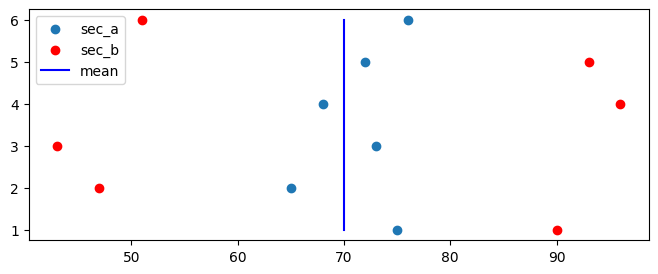

In [20]:
plt.figure(figsize=(8,3))
plt.scatter(sec_a,no,label="sec_a")
plt.scatter(sec_b,no,color="red",label="sec_b")
plt.plot([70,70,70,70,70,70],no,color="blue",label="mean")
plt.legend()
plt.show()

In [21]:
### Standard Deviation
np.std(sec_a),np.std(sec_b)

(3.8622100754188224, 23.18045153428495)

In [22]:


### Variance
np.var(sec_a),np.var(sec_b)

(14.916666666666666, 537.3333333333334)

In [23]:
dataset["Age"].var()

169.0523999372108

In [24]:

dataset["Age"].std()

13.002015226002882

In [25]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<function matplotlib.pyplot.show(close=None, block=None)>

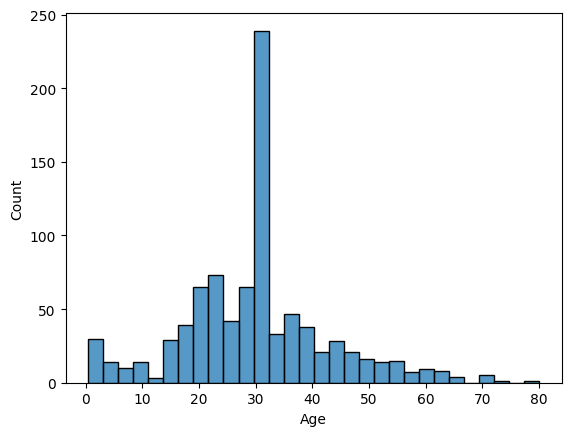

In [26]:
sns.histplot(x="Age",data=dataset)
plt.show

In [27]:
dataset.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:

### Percentile
np.percentile(dataset["Age"],100),np.percentile(dataset["Age"],75)

(80.0, 35.0)

In [29]:
dataset["Age"].min(),dataset["Age"].max()

(0.42, 80.0)

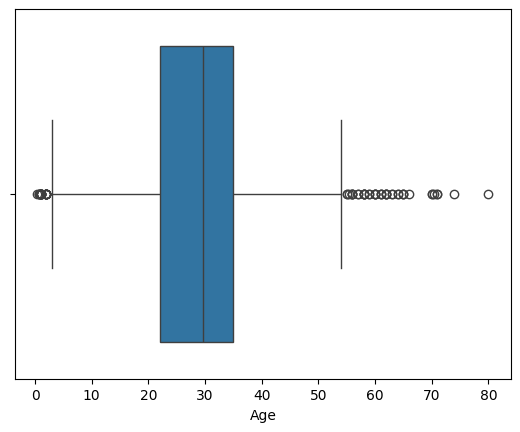

In [30]:
sns.boxplot(x="Age",data=dataset)
plt.show()

In [31]:
def find_outliers_IQR(dataset, Age):

    q1 = dataset["Age"].quantile(0.25)
    q3 = dataset["Age"].quantile(0.75)
    IQR = q3 - q1

    outliers = dataset[(dataset["Age"] < (q1 - 1.5 * IQR)) | (dataset["Age"] > (q3 + 1.5 * IQR))]

    return outliers

# Assuming 'dataset' is your DataFrame and 'age' is the column name
outliers = find_outliers_IQR(dataset, 'Age')

print("Number of outliers: " + str(len(outliers)))
print("Max outlier value: " + str(outliers['Age'].max()))
print("Min outlier value: " + str(outliers['Age'].min()))


Number of outliers: 66
Max outlier value: 80.0
Min outlier value: 0.42


In [32]:
### +ve Skewness bcoz it is greater that 0
dataset["Age"].skew()

0.4344880940129925

In [33]:
### -ve skewness bcoz it is -ve aligned
data=np.random.normal(0,100,100)

In [34]:
df=pd.DataFrame({"x":data})
df

,x
0,-20.629054
1,54.852981
2,-35.132330
3,7.143810
4,208.759822
...,...
95,-17.469457
96,171.124620
97,41.830413
98,-46.512732


In [35]:
df["x"].skew()

0.5346439009133062

In [36]:
dataset["Age"].mean(),dataset["Age"].median()

(29.69911764705882, 29.69911764705882)

In [37]:
### Corelatin
df=pd.read_csv("/Users/User/Downloads/tips.csv")
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [38]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [39]:
data_corr=df.select_dtypes(["float64","int64"]).corr(method='pearson')
data_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [40]:
### Covariance
data_cov=df.select_dtypes(["float64","int64"]).cov()
data_cov

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


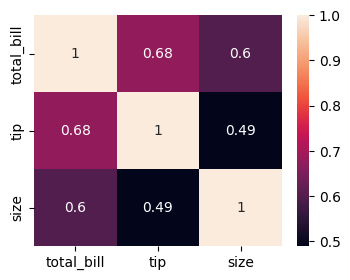

In [41]:
plt.figure(figsize=(4,3))
sns.heatmap(data_corr,annot=True)
plt.show()

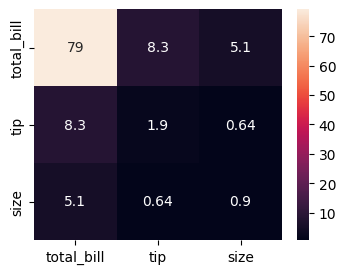

In [42]:
plt.figure(figsize=(4,3))
sns.heatmap(data_cov,annot=True)
plt.show()


In [43]:
### Central Limit theorem
import numpy as np
pop_data = np.random.randint(10, 100, size=10000)
pop_table=pd.DataFrame({"pop_data":pop_data})

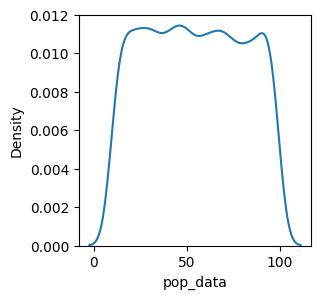

In [44]:
plt.figure(figsize=(3,3))
sns.kdeplot(x="pop_data",data=pop_table)
plt.show()

In [45]:
import numpy as np

# Example population data (normally distributed)
pop_data = np.random.randn(1000)  

sample_mean = []
for no_sam in range(50):  # range should use an integer, not a float
    sample_data = []
    for data in range(500):
        sample_data.append(np.random.choice(pop_data))
    sample_mean.append(np.mean(sample_data))


TypeError: 'numpy.float64' object is not callable

In [46]:
sample_M=pd.DataFrame({"Sample_Mean":sample_mean})

C:\Users\User\AppData\Local\Temp\ipykernel_25568\980089624.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x="Sample_Mean",data=sample_M)


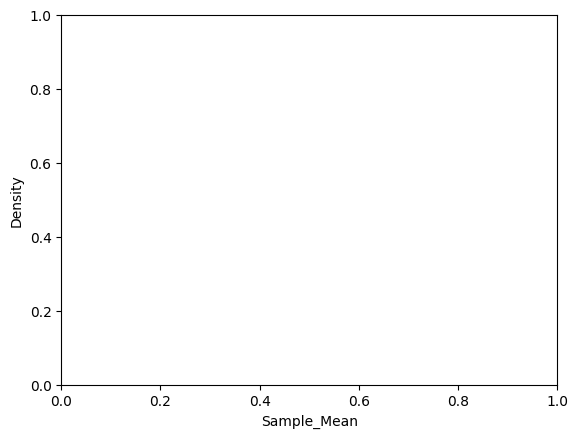

In [47]:
sns.kdeplot(x="Sample_Mean",data=sample_M)
plt.show()

In [48]:
### Hypothesis Testing
### Z test
import scipy.stats as st
st.norm.ppf(0.95) ### at 95 percemtile ztest is 1.6

1.6448536269514722

In [49]:
s_x=90
p_sd=20
s_n=81
p_u=82
ap=0.05
z_cal=(s_x-p_u)/(p_sd/np.sqrt(s_n))
z_table=st.norm.ppf(1-ap)
z_cal,z_table

(3.5999999999999996, 1.6448536269514722)

In [50]:
if z_table<z_cal:
    print("h1 is right")

h1 is right


In [53]:
### T test
import scipy.stats as st
t_table=st.t.ppf(0.05,24)
t_table

-1.7108820799094282

In [55]:
#### Chi square test
import numpy as np
ob=np.array([22,17,20,26,22,13])
ex=np.array([20,20,20,20,20,20])



In [57]:
np.sum(np.square(ob-ex)/ex)

5.1000000000000005